# Analysis of Titanic Passengers Dataset using Numpy and Pandas



### Stage 1 : Importing Dataset and pandas, numpy

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
titanicdata = pd.read_csv("titanic-data.csv")

### Stage 2 : Data Cleaning

From the first look of data set, some of the rows have missing age and Cabin data. Also, data like PassengerId,Ticket and Cabin is not useful for our analysis. Even the names are not useful. We are more interested to find out which factors helped the survival of some passengers. Hence, let us first clean our data set by removing the above mentioned columns and missing rows.

In [39]:
# Removing PassengerID, Cabin and Ticket Columns
titanic_data = titanicdata.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [40]:
titanic_data_remove_na = titanic_data.dropna()

### Stage 3 : Data Exploration

Above, I have created two data frames. First frame contains NAN values and second does not contain any rows with NAN values.

Let us explore some values from data. Let us start asking basic questions and then move to tough ones.

#### Question 1: How many people survived? Percentage ?

Let us answer this question by converting 'Survived' column to Numpy Array

In [41]:
survived = np.array(titanic_data['Survived'])
no_people_survived = np.count_nonzero(survived)
print no_people_survived

percent_survived = (np.mean(survived)*100)
print percent_survived

342
38.3838383838


#### Question 2: How many people were from first class, second class and third class?


Pclass
1    216
2    184
3    491
dtype: int64


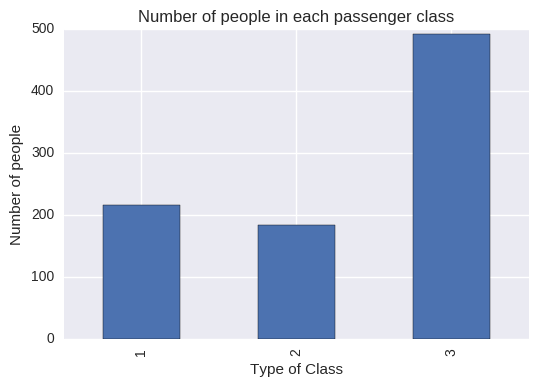

In [42]:
pclass = titanic_data.groupby('Pclass').size()
print pclass
pclass.plot(kind='bar')
plt.title("Number of people in each passenger class")
plt.xlabel("Type of Class")
plt.ylabel("Number of people")

From above histogram, we can see that Class 1 had 216, Class 2 had 184 and Class 3 had 491 passengers

#### Question 3: How many males and females were onboard?

Using Pandas groupby() function to get number of males and females

In [43]:
titanic_data.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

#### Question 4: What is average age? 

For this question, we need to remove all rows which do not have age information. After removing those rows, let us find the average age.

29.6420926966


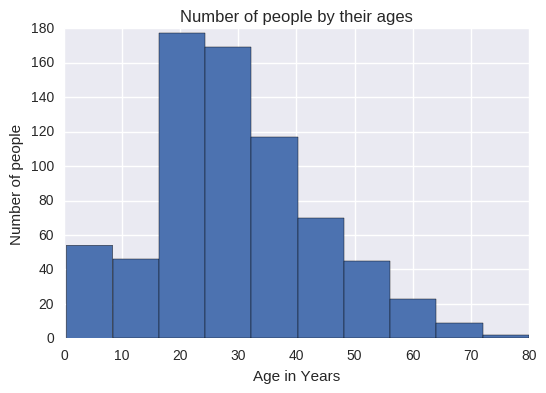

In [44]:
print titanic_data_remove_na['Age'].mean()
plt.hist(titanic_data_remove_na['Age'],bins=10)
plt.title("Number of people by their ages")
plt.xlabel("Age in Years")
plt.ylabel("Number of people")


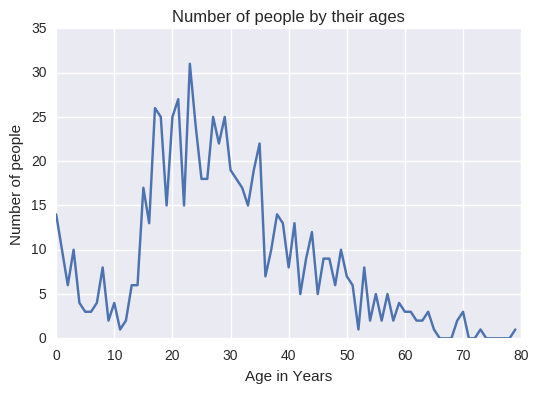

In [45]:
age = np.histogram(titanic_data_remove_na['Age'],bins=np.arange(titanic_data_remove_na['Age'].min(), titanic_data_remove_na['Age'].max()+1))
plt.plot(age[0])
plt.title("Number of people by their ages")
plt.xlabel("Age in Years")
plt.ylabel("Number of people")

#### Question 5: What is average fare of each class?

For this problem, we need to group by passenger class and then calculate average fare over each class

In [46]:
titanic_data.groupby('Pclass').mean()['Fare']

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

#### Question 6: How many people embarked from S/C/Q? 

In [47]:
titanic_data.groupby('Embarked').size()

Embarked
C    168
Q     77
S    644
dtype: int64

#### Question 7: How many people were travelling alone? (without siblings/spouse/parents/children)

In [48]:
titanic_data.groupby(['SibSp','Parch']).size()

SibSp  Parch
0      0        537
       1         38
       2         29
       3          1
       4          1
       5          2
1      0        123
       1         57
       2         19
       3          3
       4          3
       5          3
       6          1
2      0         16
       1          7
       2          4
       3          1
3      0          2
       1          7
       2          7
4      1          9
       2          9
5      2          5
8      2          7
dtype: int64

This shows that 537 people were travelling alone.

#### Question 8 : Is there a relationship between survival and passenger class? Were higher class passengers given preference for life boat?

In [49]:
# Total people by Passenger Class
total_PClass = titanic_data.groupby('Pclass').size()
total_PClass_Survived = titanic_data.groupby(['Pclass','Survived']).size()

print "Percent of Class 1 survived: ",(100.*total_PClass_Survived[1][1] / total_PClass[1])
print "Percent of Class 2 survived: ",(100.*total_PClass_Survived[2][1] / total_PClass[2])
print "Percent of Class 3 survived: ",(100.*total_PClass_Survived[3][1] / total_PClass[3])

Percent of Class 1 survived:  62.962962963
Percent of Class 2 survived:  47.2826086957
Percent of Class 3 survived:  24.2362525458


#### Question 9 : Were females preferred to  get a life boat than men? or vice versa? Is there a relationship between sex and survival?

In [50]:
#Total people by Sex
total_sex = titanic_data.groupby('Sex').size()

total_sex_survival = titanic_data.groupby(['Sex','Survived']).size()

print "Percent of Males Survived: ",(100.*total_sex_survival[3] / total_sex[1])
print "Percent of Females Survived: ",(100.*total_sex_survival[1] / total_sex[0])

Percent of Males Survived:  18.8908145581
Percent of Females Survived:  74.2038216561


#### Question 10 : How much percent of children survived versus adults? (Assuming all those whose age is less than 18 are children) 

Lets try using functions and pandas applymap function for our analysis in this question.

In [51]:
def isAdult(age):
    if age < 18:
        return 0
    else:
        return 1

In [52]:
test = titanic_data_remove_na
age_data = pd.DataFrame(test['Age'])
isAdult = age_data.applymap(isAdult)
titanic_data_remove_na['isAdult'] = isAdult



/home/rdaware/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [53]:
#Total people by isAdult
total_isAdult = titanic_data_remove_na.groupby('isAdult').size()
print total_isAdult

total_isAdult_survived = titanic_data_remove_na.groupby(['isAdult','Survived']).size()
print total_isAdult_survived

print "Percent of Kids Survived: ",(100.*total_isAdult_survived[0][1] / total_isAdult[0])
print "Percent of Adults Survived: ",(100.*total_isAdult_survived[1][1] / total_isAdult[1])

isAdult
0    113
1    599
dtype: int64
isAdult  Survived
0        0            52
         1            61
1        0           372
         1           227
dtype: int64
Percent of Kids Survived:  53.982300885
Percent of Adults Survived:  37.8964941569


### Stage 4 : Conclusion

The dataset obtained had missing values in the age column. This hinders the analysis to some extent. Our analysis related to age would hae been more accurate if those missing values are present. To find the missing values, we need to perform more investigation or add random values.  

From the above questions, we have got good understanding of the dataset. From the observations we made to each question, lets make a list of conclusion we can make
  1. Only 38% of people could make it back from Titanic.
  2. Class 1 had 216, Class 2 had 184 and Class 3 had 491 passengers.
  3. There were 577 males and 314 females onboard.
  4. The age of people was normally distributed with mean at 29.64 years.
  5. The average fare of Class 1 was 84.15, Class 2 was 20.66 and Class 3 was 13.68
  6. 168 passengers boarded from Cherbourg, 77 passengers boarded from Queenstown, and 644 passengers boarded from Southampton.
  7. 537 people were travelling alone without any family members onboard.
  8. We tried to find out if there is a relationship between class of travel and survival. This test will prove if higher class passengers were preferred to use rescue boats or not. From analysis, we found out that there is a relationship. There was 62.96% chance of survival if passenger had ticket from Class 1, 47.28% chance from Class 2 and 24.23% chance from Class 3.
  9. In the next analysis, we tried to find out if females were preferred to rescue than males. We found out very strong relation between sex and survival. 74.2% of females survived as opposed to only 18.89% males.
  10. Finally, we tried to find if children (age below 18) were preferred to rescue than adults. There was a higher survival rate for children marginally. 53.98% children survived as opposed to 37.89% adults.